In [ ]:
#Steps to follow:
# 1) Load the IRIS dataset
# 2) Normalize the features
# 3) Visualized the data
# 4) Design the model
# 5) Initialize the model, optimizer, and define the loss function
# 6) split data into trainset and testset
# 7) train and test the model

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html


iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

#Normalize : removing the mean and scaling to unit variance: z = (x - min) / (max-min)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

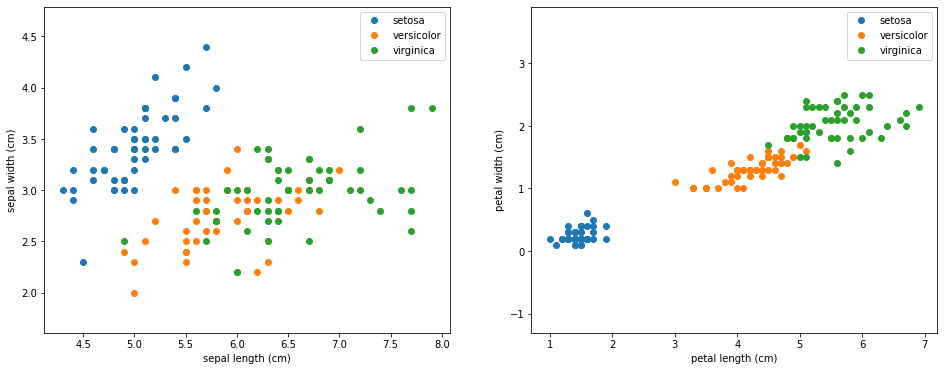

In [ ]:
import matplotlib.pyplot as plt

#Visualize the Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#plot the target based on the first two features: Sepal Width and Sepal Length
for target, target_name in enumerate(names):
    X_plot = X[y == target] #separate data accoding to the targer's values to assign a color to them
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

#plot the target based on the first two features: Petal Width and Petal Length
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


In [ ]:

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 60)
        self.layer2 = nn.Linear(60, 60)
        self.layer3 = nn.Linear(60, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x



model = Model(input_dim=4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)


X_train = Variable(torch.tensor(X_train)).float().to(device)
y_train = Variable(torch.tensor(y_train)).long().to(device)
X_test  = Variable(torch.tensor(X_test)).float().to(device)
y_test  = Variable(torch.tensor(y_test)).long().to(device)



In [ ]:
import tqdm

EPOCHS  = 10
accuracy_train = [] 
accuracy_test = []

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    #zero_grad() clears old gradients from the last step (otherwise you’d just accumulate the gradients from all loss.backward() calls).
    #loss.backward() computes the derivative of the loss w.r.t. the parameters (or anything requiring gradients) using backpropagation.
    #opt.step() causes the optimizer to take a step based on the gradients of the parameters.

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad(): #disable gradient calculation
      
      train_correct = (torch.argmax(y_pred, dim=1) == y_train).type(torch.FloatTensor)
      accuracy_train.append(train_correct.mean())
      y_pred = model(X_test)
      test_correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
      accuracy_test.append(test_correct.mean())


100%|██████████| 10/10 [00:00<00:00, 511.94it/s]


In [ ]:
y_pred

tensor([[1.0000e+00, 4.2843e-06, 1.0326e-25],
        [9.9998e-01, 2.0044e-05, 4.3178e-24],
        [2.3089e-08, 2.9697e-06, 1.0000e+00],
        [9.9997e-01, 2.6204e-05, 2.3152e-24],
        [9.9999e-01, 1.0552e-05, 1.8620e-24],
        [7.7521e-08, 1.1064e-04, 9.9989e-01],
        [9.9987e-01, 1.3295e-04, 2.2365e-23],
        [2.5917e-09, 8.6505e-07, 1.0000e+00],
        [8.3361e-10, 4.9507e-08, 1.0000e+00],
        [9.9991e-01, 9.4001e-05, 1.2651e-23],
        [1.0000e+00, 1.4176e-06, 8.5669e-28],
        [9.9999e-01, 5.6377e-06, 3.8212e-25],
        [9.9999e-01, 9.7452e-06, 5.3791e-26],
        [1.0000e+00, 2.6076e-06, 1.8727e-27],
        [3.3578e-05, 9.9997e-01, 1.7261e-07],
        [2.2149e-05, 9.9973e-01, 2.4864e-04],
        [9.8242e-01, 1.7582e-02, 4.2140e-19],
        [9.6727e-06, 9.9999e-01, 6.2571e-09],
        [1.2826e-10, 2.3241e-09, 1.0000e+00],
        [1.0532e-05, 9.9999e-01, 1.1327e-07],
        [6.3759e-05, 3.4621e-01, 6.5373e-01],
        [3.0199e-06, 1.0000e+00, 4

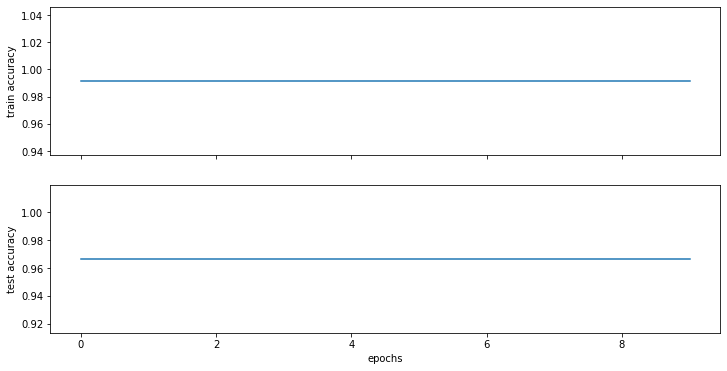

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(accuracy_train)
ax1.set_ylabel("train accuracy")
ax2.plot(accuracy_test)
ax2.set_ylabel("test accuracy")
ax2.set_xlabel("epochs");


In [ ]:
output=model(torch.tensor([[-1.5065,  0.7888, -1.3402, -1.1838]]))
print(output)